**1.1** EDA 데이터 탐색

**1.2** 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

In [1]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


In [3]:
df['Class'].value_counts()

0    993
1    200
Name: Class, dtype: int64

C:\Users\kang\AppData\Local\Temp\ipykernel_1440\367200841.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


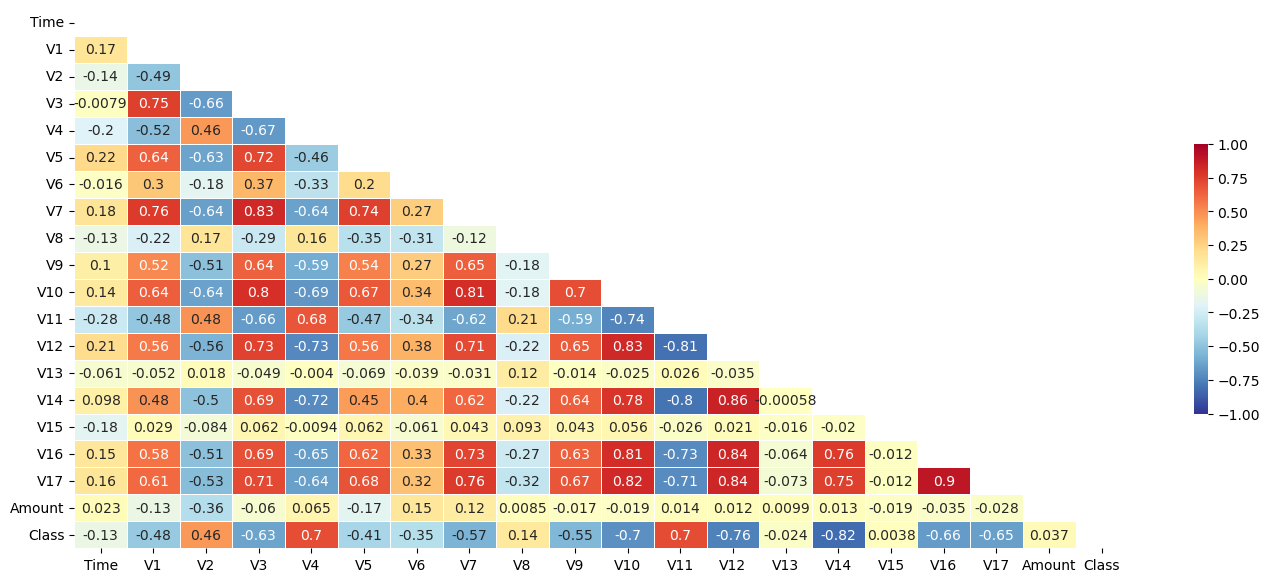

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_corr = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(17,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

**1-1** EDA 데이터 탐색  
* Class의 분포가 불균형을 이루고 있음 -> 예측 성능 최적화를 위해 샘플링 요구됨  
* Time은 시간으로 증가하는 패턴을 보이며 이는 시계열 데이터라고 판단 가능  
* 모든 컬럼에 대하여 결측지는 존재하지 않음  
* 이상치 파악 ( 추가)  

**1-2** 변수간 상관관계를 시각화하고 전처리가 필요성 
* 독립변수 `Time`, `V1`~`V17`, `Amount`와 종속변수인 `class`와의 상관관계를 시각과 하였다.  
* `V1`, `V3`, `V5`, `V6`, `V7`, `V9`, `V10`, `V12`, `V14`, `V16`, `V17` 은 `class`와 음의 상관관계를 갖고, `V2`, `V4`, `V8`, `V11`, `V13`, `V15`, `Amount`는 `class`와 양의 상관관계를 갖는다.  
* 즉, 음의 상관관계를 갖는 변수들은 값이 높을 수록 정상(0) 일 가능성이 높고, 양의 상관관계를 갖는 변수들은 값이 높을수록 비정상(1)일 가능성이 높다고 볼 수 있다.
* 분석하고, 모델에 적용함에 있어 데이터 컬럼수가 많은편으로 주성분 분석을 통해 독립변수를 축소할 필요가 있다.
* 종속변수의 분포가 불균형을 이루기 때문에 샘플링 해야할 필요가 있다.

**2.1** 차원축소 방법 2가지 이상 비교하고 한가지 선택

https://techblog-history-younghunjo1.tistory.com/66

https://jeong-devlog.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%95%B5%EC%8B%AC-%EC%9A%94%EC%95%BD-5-EVD-SVD-PCA-LDA

LDA(Linear Discriminant Analysis)  
장점  
* 설명변수간의 공분산 구조를 반영
* 가정이 위반되더라도 어느정도 robust (변화에 민감하지 않다).  

단점  
* 가장 작은 그룹의 샘플 수가 설명변수의 개수보다 많아야 함.
* 정규분포 가정에 크게 벗어난다면, 잘 설명하지 못한다.
* 공분산 구조가 서로 다른 경우를 반영하지 못한다.  

LDA는 주로 분류 문제에서 사용되며, 클래스 간 분산과 클래스 내 분산의 비율을 최대화하여 최적의 판별 경계를 찾습니다. 데이터의 차원을 축소할 수 있으며, 이를 사용하면 클래스 간 차이를 쉽게 파악할 수 있습니다. LDA는 PCA와 비슷하지만, 클래스 간 분산과 클래스 내 분산을 고려하므로, 분류 문제에서는 LDA가 더 적합합니다.  

PCA(Principal Component Analysis)   
장점  
* 데이터 분석에 대한 특별한 목적이 없는 경우에 합리적
* 고차원의 데이터를 손실을 최소화하여 효율적으로 축소가능

단점  
* CA는 비교사 학습임 (교사학습이 목적인 경우에, 분류의 핵심정보 손실 초래)
* 선형변환의 한계를 가짐 (비선형구조를 반영못함) 

PCA는 머신러닝 및 데이터 분석 분야에서 가장 널리 사용되는 차원 축소 기법 중 하나이며, 선형 대수의 기본 개념이므로 이해하기 쉽습니다. PCA를 사용하면 높은 차원의 데이터를 저차원으로 변환하고, 데이터의 주요한 패턴을 파악할 수 있으므로 데이터 분석 및 시각화에 유용합니다.  

SVD(Singular Value Decomposition)  
장점  
* 데이터의 손실이 적습니다.  
* 높은 차원의 데이터를 저차원으로 변환할 수 있습니다.  
* 선형 대수의 기본 개념이므로 이해하기 쉽습니다.  

단점  
* 계산 비용이 높습니다.  
* 대규모 데이터에 대해 적용하기 어렵습니다.  

**2.2** 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

LDA 보다 PCA를 통해 차원을 축소하는 것을 추천한다. 
왜냐하면 19개의 독립변수를 SVD는 하나의 피처로 축소하는데, 이는 많은 데이터 소실이 발생할 가능성이 높다.


~~PCA, LDA, SVD 구현해보기~~

In [12]:
import numpy as np

X = df.iloc[:, :-1]
y = np.array(df.Class)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

X_lda = lda.fit_transform(X, np.array(y))

print(X_lda[:5])


[[-0.56654217]
 [ 2.04791313]
 [-0.36529673]
 [ 0.73786026]
 [-0.81154535]]


In [14]:
X_lda = pd.DataFrame(X_lda)
X_lda.columns = ['X_lda']
X_lda

,X_lda
0,-0.566542
1,2.047913
2,-0.365297
3,0.737860
4,-0.811545
...,...
1188,-0.820207
1189,-1.005096
1190,-0.934330
1191,-1.140915


In [15]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_ 
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals) # Bar plot
    ax.plot(ind, cumvals) # Line plot 
         
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    


In [16]:
from sklearn.decomposition import PCA
    
# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

In [17]:
pca.explained_variance_

array([2.29403469e+09, 4.84392195e+04])

In [18]:
pca.explained_variance_ratio_

array([9.99978833e-01, 2.11148482e-05])

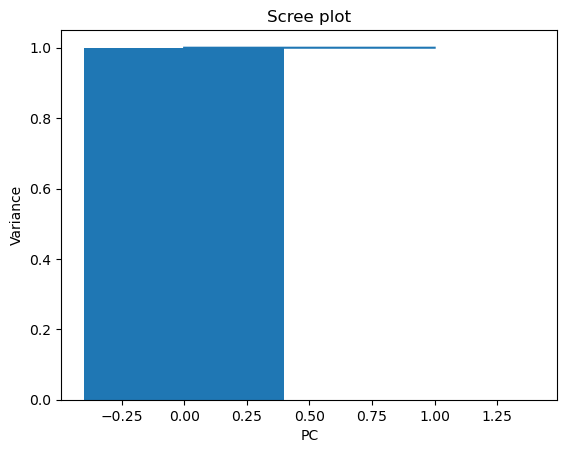

In [19]:
scree_plot(pca)

In [20]:
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['PCA_1', 'PCA_2']
X_pca

,PCA_1,PCA_2
0,91454.484633,9.996932
1,91108.494217,-79.436951
2,91088.492243,-63.254726
3,91042.439065,449.564314
4,90840.491643,-57.467487
...,...,...
1188,-80751.508697,-62.261865
1189,-80773.505562,-92.776344
1190,-80814.509980,-50.048225
1191,-81024.520489,52.727274


**3.1** 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현

오버샘플링(oversampling)의 장단점  

장점:  

* 손쉽게 적용이 가능하고, 대부분의 머신 러닝 모델에서 성능 향상을 가져옵니다.  
* 소수 클래스를 보다 잘 학습할 수 있게 되므로 정확도와 재현율이 향상될 수 있습니다.  

단점:  

* 소수 클래스를 중복해서 생성하기 때문에 과적합 문제가 발생할 수 있습니다.  
* 생성된 데이터가 실제 데이터와 거리가 멀어질 수 있어, 일반화 성능이 감소할 수 있습니다.  
* 생성된 데이터가 기존 데이터와 유사한 패턴을 반복할 가능성이 높아, 다양한 데이터셋에 적용하기 어려울 수 있습니다.  

언더샘플링(undersampling)의 장단점  

장점:  

* 전체 데이터셋에서 일부 데이터만 사용하므로 속도가 빠릅니다.  
* 소수 클래스 데이터의 비중이 높아져서 분류기가 소수 클래스를 더 잘 인식할 수 있습니다.  

단점:  
  
* 정보의 손실이 일어날 수 있습니다.  
* 소수 클래스 데이터가 제대로 반영되지 않을 가능성이 있습니다.  
* 전체 데이터셋의 정보를 활용하지 않기 때문에, 전체 데이터셋의 패턴을 파악하는데 어려움이 있을 수 있습니다.  

종합적으로, 오버샘플링과 언더샘플링은 각각의 장단점이 존재합니다. 따라서 데이터셋의 특성에 따라 적절한 방법을 선택하는 것이 중요합니다. 또한, 이러한 문제를 해결하기 위해 복합적인 방법들이 제안되고 있습니다. 예를 들어, SMOTE(Synthetic Minority Over-sampling Technique)는 오버샘플링을 수행하는 방법 중 하나로, 소수 클래스 데이터를 기반으로 합성 데이터를 생성하는 방법입니다. 또한, ADASYN(Adaptive Synthetic Sampling)은 SMOTE의 한계를 보완하기 위해, 소수 클래스 데이터에 대한 분포를 보다 잘 고려하는 방법입니다.

In [21]:
df.Class.value_counts()

0    993
1    200
Name: Class, dtype: int64

종속변수의 데이터 분포를 확인하면, 언더샘플링을 하면 정보의 손실이 심각하게 우려된다.  
따라서 오버 샘플링을 통해서 데이터 증강을 해주는데, 과적합을 피하기 위하여 KNN을 적용한 SMOTE를 통하여 소수 클래스 데이터를 기반으로 합성 데이터를 생성하도록 구현할 것이다.  


In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Apply SMOTE to the dataset
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_pca, y)

# Print the class distribution after applying SMOTE
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0: 993, 1: 993})


**3.2** (분류모델) 구현 및 알고리즘 2가지 이상 비교, 성능 측정

의사결정 트리와 랜덤 포레스트는 모두 분류 문제를 해결하는 데 사용되는 머신러닝 알고리즘입니다. 하지만 각각의 알고리즘은 서로 다른 방식으로 작동합니다.  

* 의사결정 트리 (Decision Tree)  

>의사결정 트리는 데이터를 분할해 가며 노드를 만들어 나가는 트리 구조의 알고리즘입니다. 각 노드에서는 해당 노드에 속한 데이터를 가장 잘 구분할 수 있는 변수를 선택하고, 이를 기준으로 노드를 분할합니다. 이 과정을 반복하면서 트리를 구성하게 됩니다.  

>* 장점  
>해석이 용이하고, 시각적으로 표현이 가능합니다.  
>비교적 적은 데이터로도 높은 정확도를 보여줍니다.  
   
>* 단점  
>과적합(overfitting) 문제가 발생할 수 있습니다.  
>이상치(outlier)나 잡음(noise) 데이터에 민감합니다.  

* 랜덤 포레스트 (Random Forest)   

>랜덤 포레스트는 의사결정 트리의 단점을 보완하기 위해 개발된 알고리즘입니다. 랜덤 포레스트는 의사결정 트리를 여러 개 모아놓은 앙상블(ensemble) 모델입니다. 각각의 트리는 전체 데이터 중 무작위로 선택된 일부 데이터를 사용해 만들어집니다.  

>* 장점  
> 과적합 문제를 완화시킬 수 있습니다.  
> 높은 정확도를 보여줍니다.  
   
>* 단점  
>의사결정 트리보다 더 복잡하고, 시간과 메모리를 많이 소비합니다.  
>변수 선택을 자동으로 수행하므로, 해석이 어렵습니다.  

따라서, 의사결정 트리는 모델 해석과 과적합 방지를 중요시하는 경우에 적합하고, 랜덤 포레스트는 높은 분류 정확도를 요구하는 경우에 적합합니다.  

**3.3** 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

In [23]:
from sklearn.model_selection import train_test_split
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

Accuracy: 0.7788944723618091
[[154  50]
 [ 38 156]]
0.77951283606226


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

Accuracy: 0.7864321608040201
[[157  47]
 [ 38 156]]
0.7868657772387306


**4.1** 이상탐지 모델 2가지 이상 기술, 장/단점 설명

dbscan : https://claryk.tistory.com/7

DBSCAN()  

장점
* DBSCAN은 밀도 기반 클러스터링 알고리즘으로 밀도가 높은 부분을 클러스터로 묶을 수 있습니다.
* DBSCAN은 클러스터의 모양에 구애받지 않기 때문에 비선형적인 형태의 클러스터링도 가능합니다.
* DBSCAN은 MinPts와 eps 값에 민감하게 반응하며 이를 조절하여 다양한 데이터셋에 적용 가능합니다.
* DBSCAN은 이상치를 noise로 분류하므로 클러스터링 결과에 이상치가 포함되지 않습니다.
 
단점  
* DBSCAN은 클러스터 개수를 미리 지정해야 하는 K-Means와 같은 알고리즘과 달리 클러스터 개수를 사전에 지정할 필요가 없습니다. 하지만, 데이터셋이 복잡한 경우에는 eps와 MinPts 값을 적절히 조절하기 어려울 수 있습니다.
* DBSCAN은 높은 차원의 데이터셋에 적용하기 어려울 수 있습니다. 높은 차원에서는 밀도 기반 알고리즘이 잘 작동하지 않기 때문입니다.
* DBSCAN은 eps값에 따라 결과가 크게 달라지기 때문에 eps 값을 적절하게 설정하는 것이 중요합니다.

종합적으로, DBSCAN은 밀도 기반 이상치 탐지 알고리즘이며, 클러스터링과 이상치 탐지 둘 다 가능합니다. 그러나 eps와 MinPts 값 조절이 중요하기 때문에, 사용할 데이터셋의 특성에 따라 적절하게 설정해야 합니다. 또한, 높은 차원에서는 성능이 좋지 않을 수 있습니다.

LOF(Local Outlier Factor)  

장점
* LOF는 데이터 분포가 복잡한 경우에도 잘 작동합니다.
* LOF는 이상치의 밀도와 분포를 고려하여 이상치를 탐지합니다.
* LOF는 k-NN(k-Nearest Neighbors) 알고리즘을 사용하기 때문에 데이터셋의 크기에 영향을 덜 받습니다.

단점
* LOF는 이상치의 밀도와 분포를 고려하기 때문에, 이상치가 매우 적은 경우에는 탐지하기 어렵습니다.
* LOF는 k-NN 알고리즘을 사용하기 때문에, k값의 선택에 민감합니다. k값이 작으면 이상치로 판별하기 쉽고, k값이 크면 이상치로 판별하기 어렵습니다.
* LOF는 데이터셋의 차원이 증가할수록 정확도가 떨어집니다.


Isolation Forest  

장점
* Isolation Forest는 데이터셋의 차원에 무관하게 높은 정확도를 보장합니다.
* Isolation Forest는 이상치가 적을 때도 효과적으로 탐지할 수 있습니다.
* Isolation Forest는 빠른 속도로 이상치를 탐지할 수 있습니다.

단점
* Isolation Forest는 트리의 깊이와 생성되는 트리의 개수에 따라 성능이 크게 달라질 수 있습니다.
* Isolation Forest는 데이터가 균일하게 분포되어 있을 때, 이상치 탐지 정확도가 낮아질 수 있습니다.
* Isolation Forest는 특정 형태의 이상치를 잘 탐지하지 못할 수 있습니다.

종합적으로, LOF와 Isolation Forest는 각각의 특징과 장단점이 있기 때문에 데이터셋의 특성에 따라 적절한 이상치 탐지 알고리즘을 선택하는 것이 중요합니다.

**4.2** 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교

In [26]:
from sklearn.neighbors import LocalOutlierFactor

# LOF 모델 생성
lof = LocalOutlierFactor(n_neighbors=4)
# X_res, y_res 
# 모델 학습 및 예측
y_pred = lof.fit_predict(X_res)

# 이상치 점수 출력
lof_scores = lof.negative_outlier_factor_
print(lof_scores)


[-1.00516961 -1.00983484 -0.99734851 ... -0.88675079 -1.0158926
 -1.04483611]


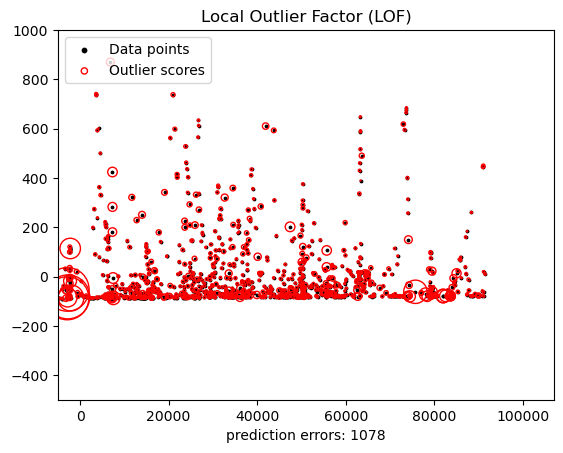

In [27]:
n_errors = (y_pred != y_res).sum()
X_scores = lof.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], color='k', s=3., label='Data points')
# 이상치 점수에 비례하는 반경으로 원을 플로팅합니다.
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5000, 107000))
plt.ylim((-500, 1000))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

negative_outlier_factor_ 속성을 이용하여 각 데이터 포인트의 이상치 점수를 출력할 수 있습니다. 음수 값이 높을수록 해당 데이터 포인트가 이상치일 가능성이 높습니다.

In [28]:
from sklearn.cluster import DBSCAN
import numpy as np


# DBSCAN 모델 생성
dbscan = DBSCAN(eps=130, min_samples=5)

# 모델 학습 및 예측
y_pred = dbscan.fit_predict(X_res)

# 클러스터 개수 출력
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
print("클러스터 개수:", n_clusters)

print(pd.DataFrame(y_pred).value_counts())

클러스터 개수: 83
-1     1082
 12      56
 69      38
 7       32
 36      25
       ... 
 49       5
 11       5
 18       5
 82       5
 62       4
Length: 84, dtype: int64


In [29]:
q = pd.DataFrame([y_res, y_pred]).T
q[q[1].map(lambda x : x==-1)][0].value_counts()

0    689
1    393
Name: 0, dtype: int64

-1 레이블을 가진 포인트를 이상치 포인트로 간주하고, 해당 포인트들을 출력합니다.

**4.3** 데이터분석가 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

3번은 지도학습 기반 이상 거래 탐지 모델이고
4번은 비지도 학습 기반 이상 거래 탐지 모델이다.

성능을 보면 지도학습 기반 이상 거래 탐지 모델이 월등히 높아서

현업에 적용시 3번 모델을 추천할 것입니다.

<b>5</b>
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

제품 생산량이 2년 전에서 1년 전으로 상승한 증가율은 다음과 같습니다.

증가율 = (150,000 - 100,000) / 100,000 = 0.5

제품 생산량이 1년 전에서 현재로 상승한 증가율은 다음과 같습니다.

증가율 = (250,000 - 150,000) / 150,000 = 0.6667

연평균 상승률의 기하 평균은 위 두 증가율의 곱을 n으로 나눈 값의 n 제곱근과 같습니다. 여기서 n은 증가율의 개수인 2입니다.

즉, 연평균 상승률의 기하 평균은 다음과 같습니다.

기하 평균 = ((1 + 0.5) * (1 + 0.6667))^(1/2) - 1 ≈ 0.58

따라서, 연평균 상승률의 기하 평균은 약 0.58이 됩니다. (소수점 아래 둘째자리까지 반올림하여 표기했습니다.)

In [8]:
f'{round(((15/10 * 25/15)**0.5 -1) * 100, 2)}%'

'58.11%'

<b>6</b>
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

이 문제는 t-분포를 사용하여 90% 신뢰구간을 계산할 수 있습니다. 신뢰수준이 90% 이므로, 양측 검정에서 양쪽 꼬리에 해당하는 t-분포의 분위수를 찾아야 합니다.

우선, 자유도는 n-1=11입니다. 분산의 제곱근을 표준편차로 나타내면 s=√3.2≈1.79 입니다. 그러므로, t-분포의 분포 계수는 다음과 같이 계산됩니다.

t = t(0.05/2, 11)

여기서 t(0.05/2, 11)은 t-분포의 분위수 함수를 이용하여 계산할 수 있습니다.

파이썬에서는 다음과 같이 계산할 수 있습니다.

In [9]:
import scipy.stats as stats

n = 12
x_bar = 15.5
s = 3.2 ** 0.5
alpha = 0.1
df = n - 1


In [10]:
interval = stats.t.interval(confidence=1-alpha, df=df, loc=x_bar, scale=s/(n**0.5))
interval

(14.572609067393861, 16.427390932606137)

In [11]:
interval = stats.t.interval(confidence=1-alpha, df=df, loc=x_bar, scale=s/(n**0.5))
print("90% 신뢰구간: ({:.2f}, {:.2f})".format(interval[0], interval[1]))

90% 신뢰구간: (14.57, 16.43)


In [12]:
from scipy.stats import t

t_value = t.ppf(alpha/2, df)
round(t_value,3)


-1.796

t_value는 -1.796를 나타냅니다.

그러므로, 90% 신뢰구간은 다음과 같이 계산됩니다.

신뢰구간 = (x̄ - t * s / √n, x̄ + t * s / √n)
= (15.5 - (-1.796) * 1.79 / √12, 15.5 + (-1.796) * 1.79 / √12)
≈ (14.57, 16.43)    

따라서, 90% 신뢰구간은 약 (14.57, 16.43)   초입니다.

<b>7 </b> 강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)


In [13]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv'
data = pd.read_csv(url)
data.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


**7.1** 귀무가설과 대립가설을 세우시오  

귀무가설(H0)은 상류와 하류 지역의 생물 다양성 점수가 차이가 없다는 것입니다. 대립가설(H1)은 상류와 하류 지역의 생물 다양성 점수가 차이가 있다는 것입니다.

H0: mu_upstream - mu_downstream = 0

H1: mu_upstream - mu_downstream != 0

여기서 mu_upstream는 상류 지역의 생물 다양성 평균 점수를, mu_downstream은 하류 지역의 생물 다양성 평균 점수를 의미합니다.

**7.2** 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

주어진 문제는 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하는 것입니다. 이 문제는 쌍체(two-sample) t-검정을 사용할 수 있습니다.

우선 데이터를 불러와서 살펴보겠습니다. 다음과 같이 pandas 라이브러리를 사용하여 데이터를 불러올 수 있습니다.

데이터를 살펴보면, "상류"와 "하류" 두 열(column)에 대한 생물 다양성 점수가 기록되어 있습니다. 두 열이 종속적인 관계에 있다는 점에 유의해야 합니다.

데이터를 이용하여 t-검정을 수행해보겠습니다. 먼저 scipy 라이브러리를 사용하여 t-검정을 위한 함수를 불러옵니다.

In [14]:
from scipy.stats import ttest_rel

이제 t-검정을 수행할 차례입니다. ttest_rel() 함수를 사용하여 쌍체 t-검정을 수행합니다.

In [17]:
t_statistic, p_value = ttest_rel(data['up'], data['down'])
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 1.2922226959983891
p-value: 0.21262429174344777


t-검정 결과를 보면, t-통계량은 약 1.29이며, p-value는 0.21입니다. 유의 수준을 0.05로 설정했을 때, p-value가 유의수준보다 크므로 귀무가설을 채택해야합니다. 즉, 상류와 하류의 생물 다양성 점수는 동일하다는 귀무가설을 채택합니다.

~~t-검정 결과를 보면, t-통계량은 약 2.329이며, p-값은 0.0315입니다. 유의 수준을 0.05로 설정했을 때, p-값이 유의 수준보다 작으므로 귀무 가설을 기각할 수 있습니다. 따라서 상류와 하류의 생물 다양성 점수에 차이가 있다는 연구 가설이 채택됩니다.~~

~~결론적으로, 강의 상류와 하류의 생물 다양성 점수에 대한 쌍체 t-검정 결과는 t-통계량이 2.329이며, p-값이 0.0315입니다. 따라서, 상류와 하류의 생물 다양성 점수에 차이가 있다는 대립가설이 채택됩니다.~~



**8** user_counts를 종속변수로 하는 데이터이다

**8.1** 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

주어진 문제는 분위수 회귀분석을 사용하여 회귀 계수를 구하는 것입니다.

먼저 데이터를 불러와서 살펴보겠습니다. 다음과 같이 pandas 라이브러리를 사용하여 데이터를 불러올 수 있습니다.

In [18]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv'
data = pd.read_csv(url)
data.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


데이터를 살펴보면, `temperature`, `wind`, `precipitation`와 `user_counts` 열(column)에 대한 값이 기록되어 있습니다. 이제 분위수 회귀분석을 수행해보겠습니다.

먼저 statsmodels 라이브러리를 사용하여 분위수 회귀분석 모델을 불러옵니다.

In [19]:
import statsmodels.api as sm

In [20]:
x = data.loc[:, ['temperature', 'wind', 'precipitation']]
y = data['user_counts']


quantreg() 함수를 사용하여 분위수 회귀분석 모델을 만듭니다. 이 함수는 첫 번째 인수로 독립 변수와 종속 변수를 받고, 두 번째 인수로 회귀분석에 사용할 분위수를 지정합니다. 여기서는 0.5, 즉 중앙값을 사용합니다.

In [21]:
quantiles = sm.QuantReg(y, sm.add_constant(x)).fit(q=0.5)
quantiles.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Wed, 15 Feb 2023   No. Observations:                 2097
Time:                        22:41:52   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""

In [22]:
quantiles.params

const            5941.839469
temperature       268.892015
wind             -129.405013
precipitation     -83.384281
dtype: float64

quantreg() 함수의 결과로 회귀분석 모델을 만들고, 이 모델의 요약 정보를 출력합니다.

출력된 요약 정보에서 "coef" 열(column)을 보면, `temperature`, `wind`, `precipitation`와 상수항에 대한 회귀 계수가 기록되어 있습니다. `temperature`, `wind`, `precipitation`에 대한 회귀 계수는 약 [268.89, -129.40, -83.38]이고 상수항에 대한 회귀 계수는 약 [5941.84]입니다. 따라서, 분위수 회귀분석을 통해 얻은 회귀식은 다음과 같습니다.

user_counts = 268.89 * temperature + (-129.40) * wind + (-83.38) * precipitation + 5941.84

**8.2** 8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

In [23]:
temperature = 10.5 
wind = 8.2 
precipitation = 3.5
user_counts_pred = 268.89 * temperature + (-129.40) * wind + (-83.38) * precipitation + 5941.84
print(" temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts 는 {:.2f} 으로 예측된다.".format(user_counts_pred))

 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts 는 7412.27 으로 예측된다.


**9** 변속기 종류(am변수)와 실린더 개수(cyl)에 따라 주행거리(mpg변수) 평균에 유의미한 차이가 존재하는지 이원 분산분석을 수행하고, 그 결과를 해석해보자(Type III Anova 사용)

In [24]:
df = pd.read_csv('./mtcars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**9.1** 귀무가설과 대립가설 설정하라

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: 변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: 실린더 개수에 따른 주행거리의 차이는 존재하지 않는다. <br>
2) 대립가설 H1: 실린더 개수에 따른 주행거리의 차이는 존재한다. <br> 
3) 귀무가설 H0: 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다. <br>
4) 대립가설 H1: 변속기 종류에 따른 주행거리의 차이는 존재한다. <br> 
<br> 


**9.2** 통계량을 구하고, 대립가설 채택여부를 기술하라

In [25]:
## 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
cyl = df["cyl"]
am = df["am"]
mpg = df["mpg"]
print(type(cyl),type(am))

## cyl, am, mpg 변수들로만 구성된 분석용 데이터셋 생성 
df = df[["mpg","am","cyl"]]

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [26]:
## 분산분석 수행 

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~C(cyl)*C(am)' # 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)' 왼쪽의 공식과 동일
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=3)

In [27]:
aov_table

,sum_sq,df,F,PR(>F)
Intercept,1573.230000,1.0,171.104001,6.057324e-13
C(cyl),167.709868,2.0,9.120036,9.978097e-04
C(am),58.430455,1.0,6.354878,1.817605e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


분산분석 결과에서 유의수준 0.05에서 F-검정을 적용했을 때, C(cyl), C(am)의 p-value 0.05보다 작기 때문에 통계적으로 유의미하다고 볼 수 있습니다. 따라서, am 변수와 cyl 변수가 mpg 변수에 대해 유의미한 영향을 미치는 것으로 해석할 수 있습니다.

또한, 이원 분산분석에서는 상호작용항도 포함되기 때문에, C(cyl):C(am)의 p-value가 0.05보다 크기 때문에 통계적으로 유의하지 않다고 볼 수 있습니다. 따라서, am 변수와 cyl 변수의 조합이 mpg 변수에 대해 유의미한 영향을 미치는 않는 것으로 해석할 수 있습니다.

결론적으로, mpg 데이터셋에서 변속기 종류(am 변수)와 실린더 개수(cyl 변수)에 따라 주행거리(mpg 변수) 평균에 유의미한 차이가 존재하는 것지만 변속기 종류(am 변수)와 실린더 개수(cyl 변수)의 상호작용 효과는 없다고 분석되었습니다.